In [245]:
# Usei como base esse tutorial:
# https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/regression.ipynb#scrollTo=f-OHX4DiXd8x

In [246]:
# # Clear logs
# %rm -rf ./logs/

# Ativação do Tensorboard
%conda activate pystock
%load_ext tensorboard

# Reload Tensorboar
# %reload_ext tensorboard



Note: you may need to restart the kernel to use updated packages.
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Sequential model

*Dense model 16*
*Dense model 16*
*Dense model 8*
*Dense model 4*
*Epoch 350*

_MSE: 1.31_
epoch: 350

Activation: softplus
Optimizer: Adam

15/15 - 0s - loss: 0.6325 - mae: 0.5830 - mse: 0.6325
Testing set Mean Abs Error:  0.58 ibova_0

In [247]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras import layers

In [248]:
dataset_path = 'mean10_ibova_oil_usd_ROC3.csv'
raw_dataset = pd.read_csv(dataset_path, sep=",")

dataset = raw_dataset.copy()


In [249]:
# dataset.drop(['oil_0', 'oil_1', 'oil_2', 'oil_3', 'oil_4', 'oil_5','usd_0', 'usd_1', 'usd_2', 'usd_3', 'usd_4', 'usd_5'], axis=1)


In [250]:
# Ver se settar os maximos positivos 
# Verificar se o fit ja ta 'normalizando' os valores max e min da base
# 
# Pra transformar em dados mais constantes 
# Scaller e desvio padrao 1 
# 
# 
dataset

,Unnamed: 0,ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,ibova_5,oil_0,oil_1,oil_2,oil_3,oil_4,oil_5,usd_0,usd_1,usd_2,usd_3,usd_4,usd_5
0,0,6.357283,6.956410,6.935300,6.674510,6.068790,5.415600,6.357283,6.956410,6.935300,6.674510,6.068790,5.415600,6.357283,6.956410,6.935300,6.674510,6.068790,5.415600
1,1,6.956410,6.935300,6.674510,6.068790,5.415600,4.784691,6.956410,6.935300,6.674510,6.068790,5.415600,4.784691,6.956410,6.935300,6.674510,6.068790,5.415600,4.784691
2,2,6.935300,6.674510,6.068790,5.415600,4.784691,4.116341,6.935300,6.674510,6.068790,5.415600,4.784691,4.116341,6.935300,6.674510,6.068790,5.415600,4.784691,4.116341
3,3,6.674510,6.068790,5.415600,4.784691,4.116341,2.846193,6.674510,6.068790,5.415600,4.784691,4.116341,2.846193,6.674510,6.068790,5.415600,4.784691,4.116341,2.846193
4,4,6.068790,5.415600,4.784691,4.116341,2.846193,1.887861,6.068790,5.415600,4.784691,4.116341,2.846193,1.887861,6.068790,5.415600,4.784691,4.116341,2.846193,1.887861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,2378,-0.164195,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598,-0.164195,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598,-0.164195,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598
2379,2379,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-0.238950,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995
2380,2380,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-0.705643,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697
2381,2381,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775,-1.438762,-2.093890,-2.946598,-3.644995,-4.502697,-5.145775


In [251]:
train_dataset = dataset.head(1914)
train_dataset = train_dataset.drop(['oil_0','usd_0'], axis=1)
train_labels = train_dataset.pop('ibova_0')


test_dataset = dataset.tail(479)
test_dataset = test_dataset.drop(['oil_0','usd_0'],axis=1)
test_labels = test_dataset.pop('ibova_0')



# Inspecionando os dados

In [252]:
# sns.pairplot(train_dataset[['index','ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','oil_0','oil_1','oil_2','oil_3','oil_4','usd_0','usd_1','usd_2','usd_3','usd_4']], diag_kind="kde")
# sns.pairplot(train_dataset[['index','ibova_0','oil_0','usd_0']], diag_kind="kde")
# sns.pairplot(train_dataset[['ibova_1','oil_1','usd_1']], diag_kind="kde")

In [253]:
train_stats = train_dataset.describe()
# train_stats

# Definindo o modelo

In [254]:
# Diminuir quantidade de nós 
# Funcao logistica pra optimization
# Ver se relu funciona com RMSprop

# softplus melhor até agora
def build_model():
  model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='linear')
  ])

  # optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,
                                       beta_1=0.9,
                                       beta_2=0.999,
                                       amsgrad=True)
  
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
# model.summary()

# rmse pra avaliação, nao para loss


# Definindo Métricas

In [255]:
# Seguindo esse tutorial para extrair metricas para o tensorboard
# https://www.tensorflow.org/tensorboard/get_started?hl=pt


# Define metrics
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('train_accuracy')
test_loss = tf.keras.metrics.Mean('test_loss', dtype=tf.float32)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('test_accuracy')


# Para salvar os arquivos de log
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)



## Testando o modelo

In [256]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
# example_result

# Treinado o modelo

In [257]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


EPOCHS = 1000 

early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse', patience=50, mode='min' ,restore_best_weights=True)

# earlystop como o val_mse 
# Add dados de validação 
#  validation_data=
history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1,
  callbacks=([early_stop,tensorboard_callback]))

# validação 20% do treino

# Verficicar o metodo para evitar overfitting
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

Epoch 1/1000
48/48 [==============================] - 7s 136ms/step - loss: 28605.4922 - mae: 139.9838 - mse: 28605.4922 - val_loss: 31120.0469 - val_mae: 176.0375 - val_mse: 31120.0469
Epoch 2/1000
48/48 [==============================] - 0s 8ms/step - loss: 3619.0068 - mae: 50.2269 - mse: 3619.0068 - val_loss: 4279.6992 - val_mae: 65.2338 - val_mse: 4279.6992
Epoch 3/1000
48/48 [==============================] - 1s 11ms/step - loss: 469.6167 - mae: 17.8323 - mse: 469.6167 - val_loss: 416.9716 - val_mae: 20.1817 - val_mse: 416.9716
Epoch 4/1000
48/48 [==============================] - 0s 9ms/step - loss: 41.1095 - mae: 5.0446 - mse: 41.1095 - val_loss: 20.0614 - val_mae: 3.7968 - val_mse: 20.0614
Epoch 5/1000
48/48 [==============================] - 0s 10ms/step - loss: 6.3868 - mae: 1.9652 - mse: 6.3868 - val_loss: 3.1613 - val_mae: 1.3751 - val_mse: 3.1613
Epoch 6/1000
48/48 [==============================] - 0s 10ms/step - loss: 3.6356 - mae: 1.5115 - mse: 3.6356 - val_loss: 2.8450

In [258]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
189,0.189008,0.331964,0.189008,0.141364,0.301047,0.141364,189
190,0.162173,0.306371,0.162173,0.108796,0.258133,0.108796,190
191,0.168606,0.313579,0.168606,0.107757,0.256394,0.107757,191
192,0.156616,0.301165,0.156616,0.105544,0.253207,0.105544,192
193,0.162406,0.306607,0.162406,0.124328,0.279834,0.124328,193


In [259]:
hist.mse.min()

0.15579792857170105

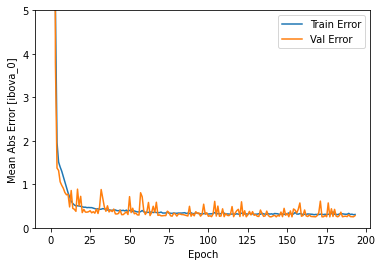

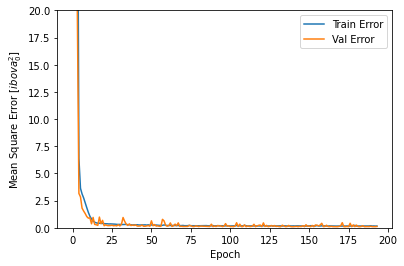

In [260]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [ibova_0]')
  plt.plot(hist['epoch'], hist['mae'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$ibova_0^2$]')
  plt.plot(hist['epoch'], hist['mse'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

Epoch 1/1000
48/48 [==============================] - 2s 34ms/step - loss: 14.2511 - mae: 2.9830 - mse: 14.2511 - val_loss: 12.8048 - val_mae: 2.8990 - val_mse: 12.8048
Epoch 2/1000
48/48 [==============================] - 0s 3ms/step - loss: 8.8844 - mae: 2.2637 - mse: 8.8844 - val_loss: 9.3682 - val_mae: 2.2695 - val_mse: 9.3682
Epoch 3/1000
48/48 [==============================] - 0s 3ms/step - loss: 8.1221 - mae: 2.1308 - mse: 8.1221 - val_loss: 7.3754 - val_mae: 2.0746 - val_mse: 7.3754
Epoch 4/1000
48/48 [==============================] - 0s 3ms/step - loss: 7.7341 - mae: 2.0533 - mse: 7.7341 - val_loss: 4.9914 - val_mae: 1.4349 - val_mse: 4.9914
Epoch 5/1000
48/48 [==============================] - 0s 3ms/step - loss: 7.2295 - mae: 1.9414 - mse: 7.2295 - val_loss: 4.7664 - val_mae: 1.3739 - val_mse: 4.7664
Epoch 6/1000
48/48 [==============================] - 0s 2ms/step - loss: 6.9583 - mae: 1.8782 - mse: 6.9583 - val_loss: 4.6896 - val_mae: 1.3573 - val_mse: 4.6896
Epoch 7/100

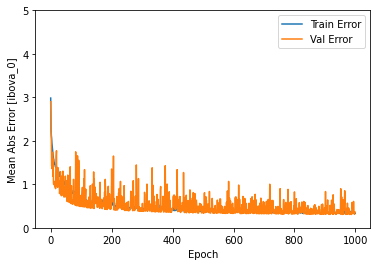

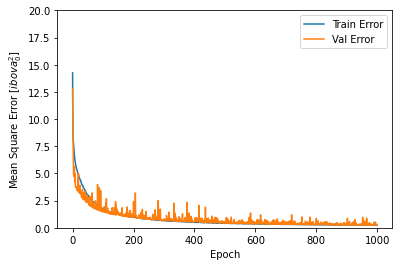

In [261]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse', patience=50, mode='min' ,restore_best_weights=True)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1, callbacks=[PrintDot(), early_stop, tensorboard_callback])

# Mudar os dados de validação

plot_history(history)

In [262]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print(f"Testing set Mean Abs Error: {mse:5.2f} ibova_0")

15/15 - 0s - loss: 8.0083 - mae: 0.8772 - mse: 8.0083
Testing set Mean Abs Error:  8.01 ibova_0


# Realizando as previsões

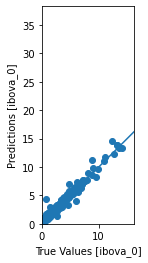

In [263]:
test_predictions = model.predict(test_dataset).flatten()
plt.figure(figsize=(24,4))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [ibova_0]')
plt.ylabel('Predictions [ibova_0]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

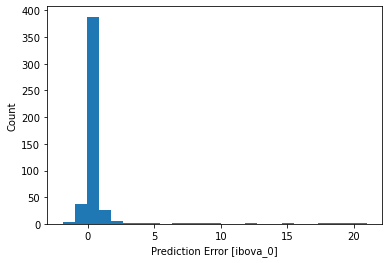

In [264]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [ibova_0]")
_ = plt.ylabel("Count")

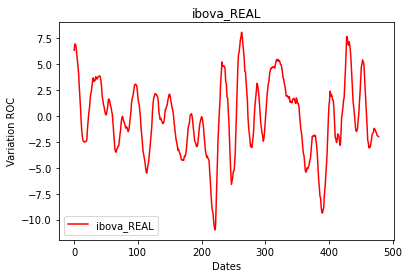

In [265]:
# Imprimindo valores reais
ibova_test = raw_dataset.ibova_0[:479]
plt.plot(ibova_test, color ='r', label='ibova_REAL')
plt.xlabel("Dates")
plt.ylabel("Variation ROC")
plt.title("ibova_REAL")
plt.legend()

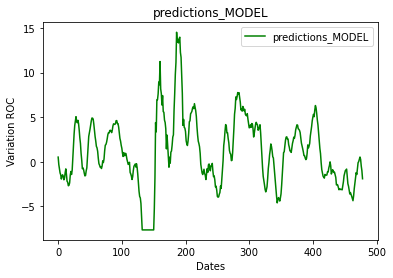

In [266]:
# Imprimindo previsoes
plt.plot(test_predictions, color ='g', label='predictions_MODEL')
plt.xlabel("Dates")
plt.ylabel("Variation ROC")
plt.title("predictions_MODEL")
plt.legend()


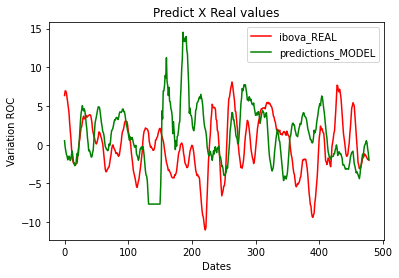

In [267]:
# Predictt X Real values
plt.plot(ibova_test, color ='r', label='ibova_REAL')
plt.plot(test_predictions, color ='g', label='predictions_MODEL')
plt.xlabel("Dates")
plt.ylabel("Variation ROC")
plt.title("Predict X Real values")
plt.legend()
plt.show()

In [268]:
# Analisando Medias:

print(f'Massa de predição: {test_predictions.mean()}')
print(f'Massa inicial: {ibova_test.mean()}')
print(f'Diferenças das médias: {ibova_test.mean() - test_predictions.mean()}')

Massa de predição: 1.1128727197647095
Massa inicial: -0.1473508431278343
Diferenças das médias: -1.2602235628925438


In [269]:
# test_dataset